<a href="https://colab.research.google.com/github/abhranil-datascience/DeepLearning/blob/ImageAnalytics/Day6_ImplementGANonFashionMNISTdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
##################################### Load Fashion MNIST Data #####################################################
import numpy as np
import keras.datasets.fashion_mnist as fmnist
(x_train,y_train),(x_test,y_test)=fmnist.load_data()
x_train.shape,y_train.shape,x_test.shape,y_test.shape

Using TensorFlow backend.


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [0]:
##################################### Concatenate Train and Test ###################################################
x=np.concatenate([x_train,x_test])
y=np.concatenate([y_train,y_test])
x = (x.astype(np.float32) - 127.5)/127.5
x=x.reshape(x.shape[0],x.shape[1]*x.shape[2])
x.shape,y.shape

((70000, 784), (70000,))

In [0]:
##################################### Check Unique Value Counts ######################################################
count={}
for item in y:
  if item not in count:
    count[item]=1
  else:
    count[item]=count[item]+1
count

{0: 7000,
 1: 7000,
 2: 7000,
 3: 7000,
 4: 7000,
 5: 7000,
 6: 7000,
 7: 7000,
 8: 7000,
 9: 7000}

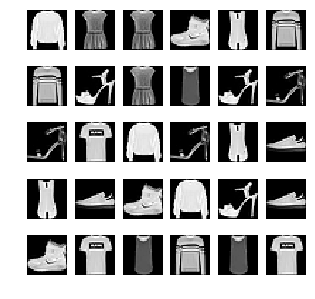

In [0]:
##################################################### View Some Images ###########################################################
zero=[]
one=[]
two=[]
three=[]
four=[]
five=[]
six=[]
seven=[]
eight=[]
nine=[]
for index in y:
  if index==0:
    zero.append(index)
  elif index==1:
    one.append(index)
  elif index==2:
    two.append(index)
  elif index==3:
    three.append(index)
  elif index==4:
    four.append(index)
  elif index==5:
    five.append(index)
  elif index==6:
    six.append(index)
  elif index==7:
    seven.append(index)
  elif index==8:
    eight.append(index)
  elif index==9:
    nine.append(index)
import random
random.shuffle(zero)
random.shuffle(one)
random.shuffle(two)
random.shuffle(three)
random.shuffle(four)
random.shuffle(five)
random.shuffle(six)
random.shuffle(seven)
random.shuffle(eight)
random.shuffle(nine)
ViewIndexes=zero[0:3]+one[0:3]+two[0:3]+three[0:3]+four[0:3]+five[0:3]+six[0:3]+seven[0:3]+eight[0:3]+nine[0:3]
len(ViewIndexes)
random.shuffle(ViewIndexes)
Images=x[ViewIndexes,:]
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
fig=plt.figure(figsize=(5,5))
columns=6
rows=5
for index in range(0,len(ViewIndexes)):
  img=Images[index]
  img=img.reshape((28,28))
  fig.add_subplot(rows, columns, index+1)
  imgplot = plt.imshow(img,cmap='gray')
  plt.axis('off')
plt.show()

In [0]:
############################################## Create the generator ##############################################
import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Model,Sequential
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam
adam_opt=Adam(lr=0.0002, beta_1=0.5)
def create_gen():
  generator=Sequential()
  generator.add(Dense(units=256,input_shape=(100,)))
  generator.add(LeakyReLU(0.2))
  generator.add(Dense(units=512))
  generator.add(LeakyReLU(0.2))
  generator.add(Dense(units=1024))
  generator.add(LeakyReLU(0.2))
  generator.add(Dense(units=784,activation='tanh'))
  generator.compile(optimizer=adam_opt,loss='binary_crossentropy')
  return generator
g=create_gen()
g.summary()







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1024)              0         
_____________________

In [0]:
###################################### Create the Discriminator ###################################################
def create_disc():
  discriminator=Sequential()
  discriminator.add(Dense(units=1024,input_shape=(784,)))
  discriminator.add(LeakyReLU(0.2))
  discriminator.add(Dropout(0.3))
  discriminator.add(Dense(units=512))
  discriminator.add(LeakyReLU(0.2))
  discriminator.add(Dropout(0.3))
  discriminator.add(Dense(units=256))
  discriminator.add(LeakyReLU(0.2))
  discriminator.add(Dropout(0.2))
  discriminator.add(Dense(units=1, activation='sigmoid'))
  discriminator.compile(loss='binary_crossentropy', optimizer=adam_opt)
  return discriminator
d=create_disc()
d.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1024)              803840    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
____

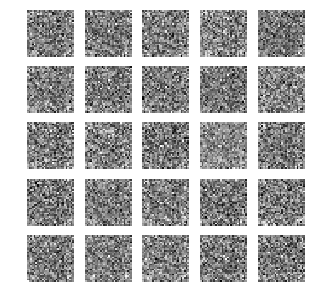

In [0]:
############################################# Generate Sample Images using Untrained Generator model ####################################################
noise= np.random.normal(loc=0, scale=1, size=[25, 100])
gen=create_gen()
generated_images = gen.predict(noise)
fig=plt.figure(figsize=(5,5))
columns=5
rows=5
for index in range(0,generated_images.shape[0]):
  img=generated_images[index]
  img=img.reshape((28,28))
  fig.add_subplot(rows, columns, index+1)
  imgplot = plt.imshow(img,cmap='gray',interpolation='none')
  plt.axis('off')
plt.show()

In [0]:
######################################## Create GAN #################################################################
def create_gan(discriminator,generator):
  discriminator.trainable=False
  gan_input=Input(shape=(100,))
  x=generator(gan_input)
  gan_output=discriminator(x)
  gan=Model(gan_input,gan_output)
  gan.compile(optimizer='adam',loss='binary_crossentropy')
  return gan
gan=create_gan(d,g)
gan.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 784)               1486352   
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 1460225   
Total params: 2,946,577
Trainable params: 1,486,352
Non-trainable params: 1,460,225
_________________________________________________________________


Epoch: 1


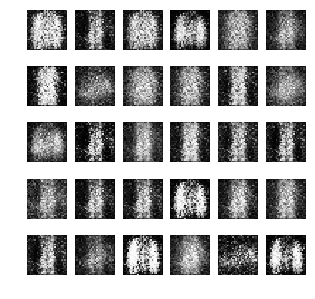

Epoch: 10


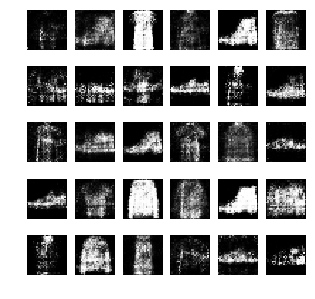

Epoch: 20


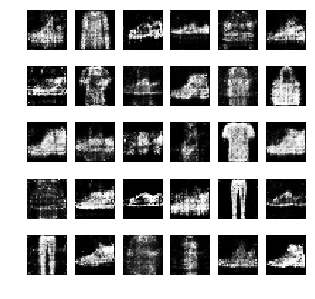

Epoch: 30


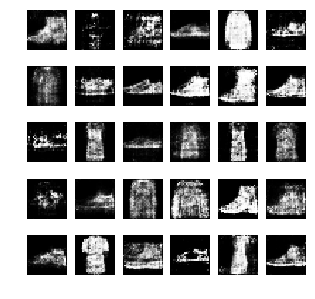

Epoch: 40


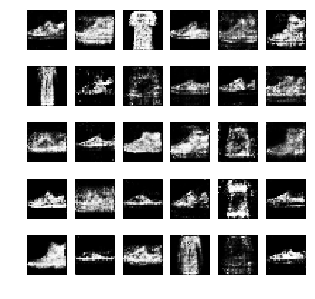

Epoch: 50


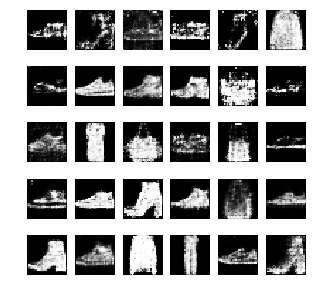

Epoch: 60


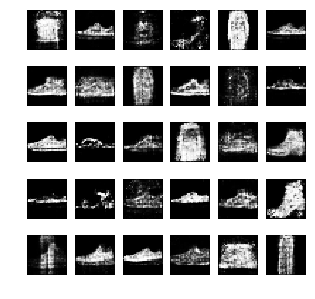

Epoch: 70


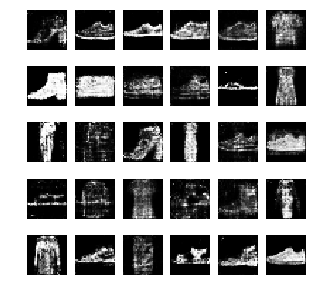

Epoch: 80


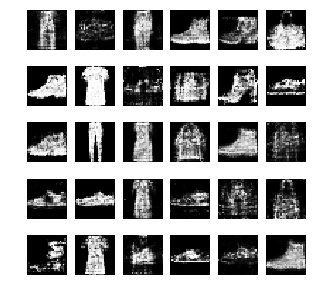

Epoch: 90


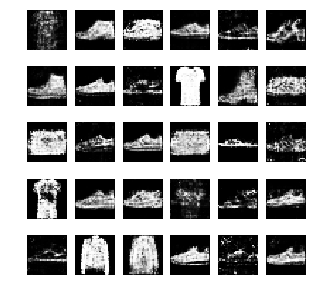

Epoch: 100


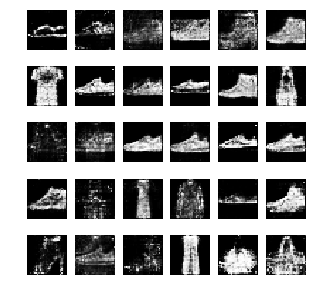

Epoch: 110


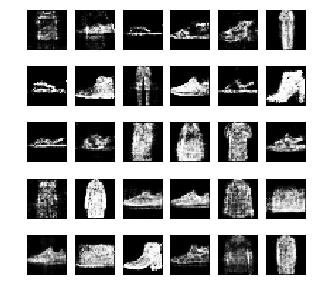

Epoch: 120


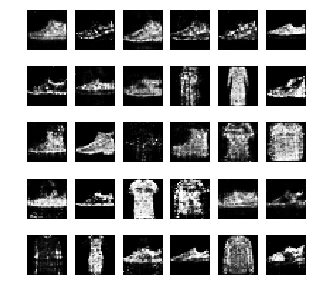

Epoch: 130


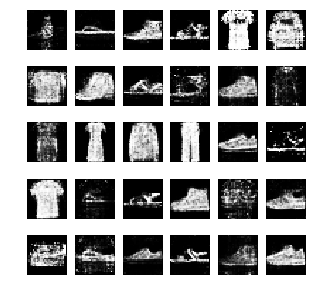

Epoch: 140


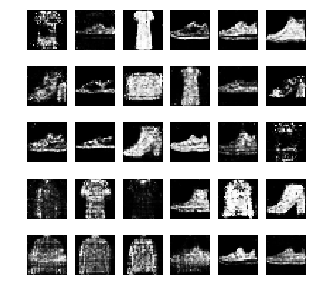

Epoch: 150


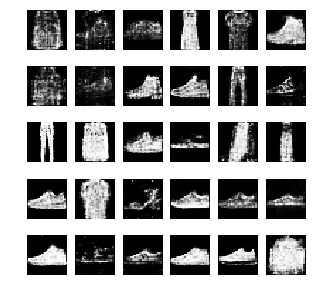

Epoch: 160


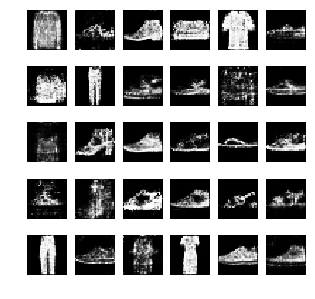

Epoch: 170


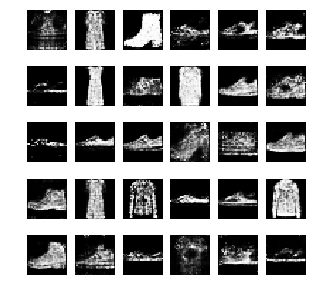

Epoch: 180


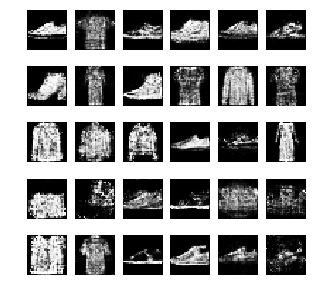

Epoch: 190


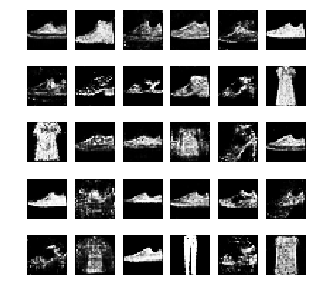

Epoch: 200


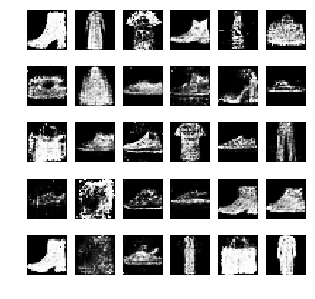

Epoch: 210


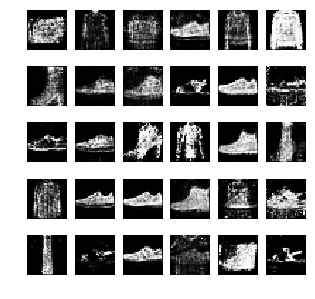

Epoch: 220


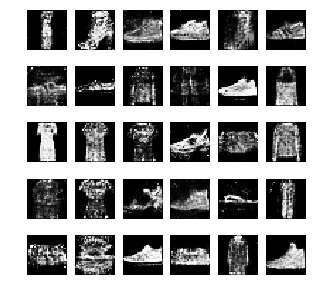

Epoch: 230


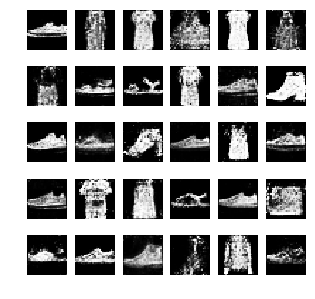

Epoch: 240


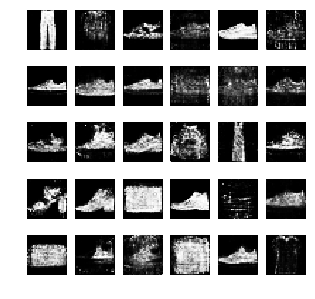

Epoch: 250


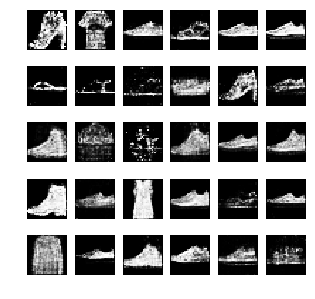

Epoch: 260


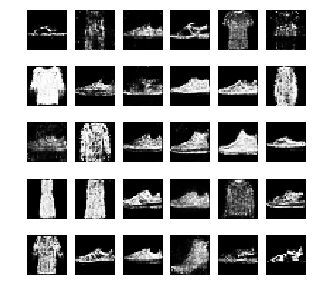

Epoch: 270


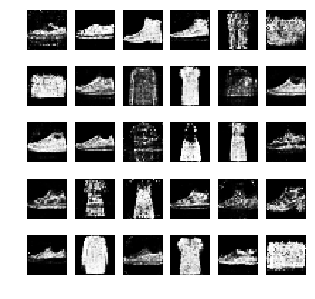

Epoch: 280


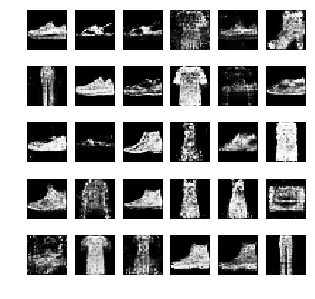

Epoch: 290


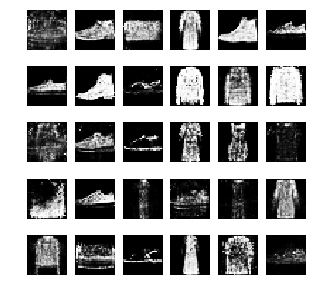

Epoch: 300


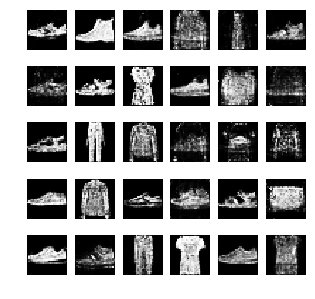

Epoch: 310


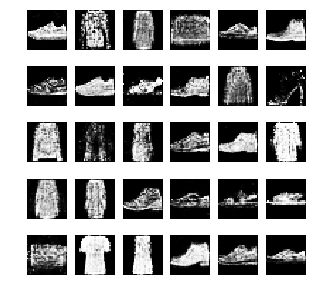

Epoch: 320


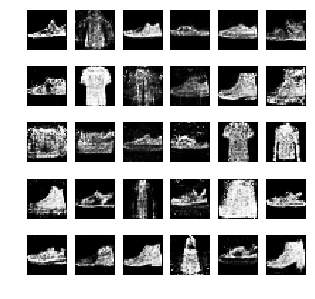

Epoch: 330


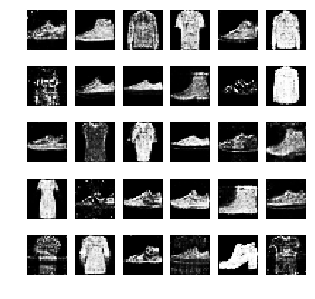

Epoch: 340


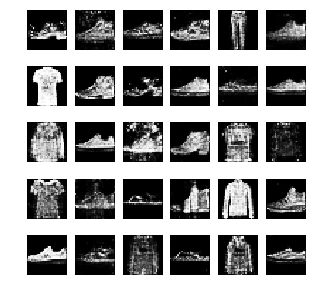

Epoch: 350


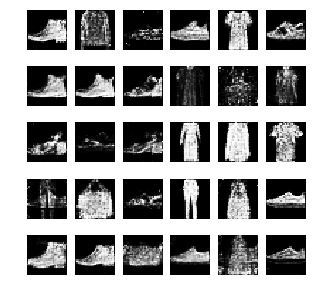

Epoch: 360


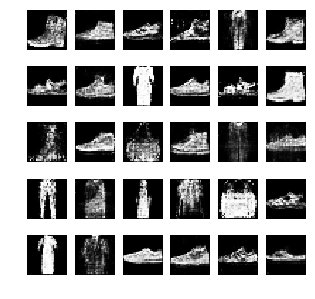

Epoch: 370


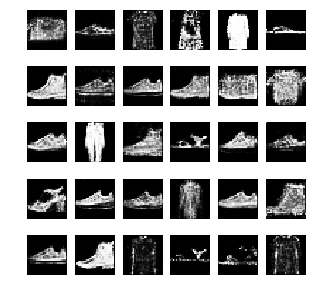

Epoch: 380


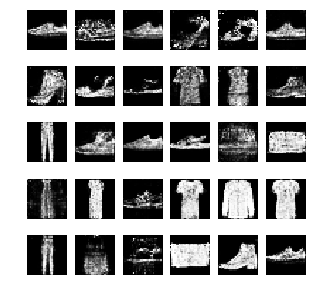

Epoch: 390


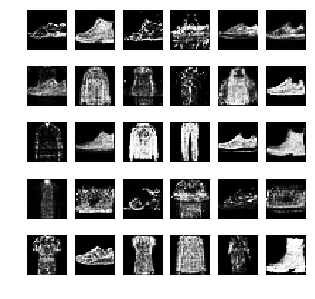

Epoch: 400


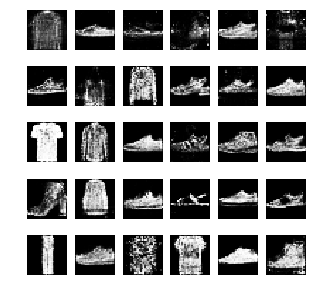

Epoch: 410


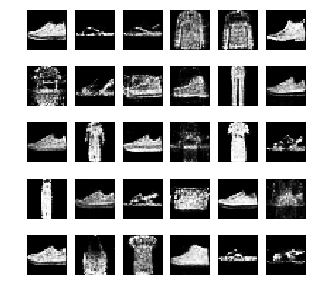

Epoch: 420


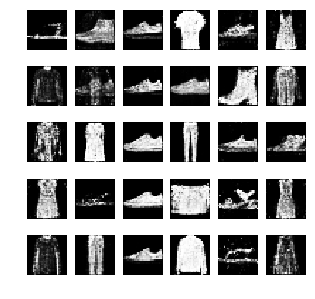

Epoch: 430


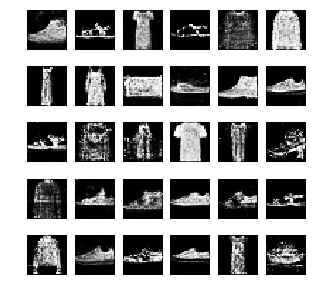

Epoch: 440


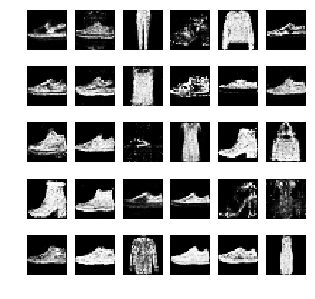

Epoch: 450


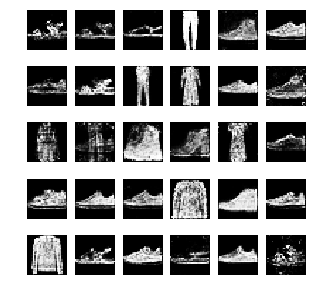

Epoch: 460


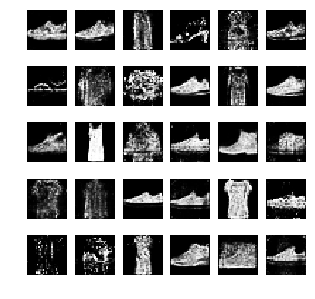

Epoch: 470


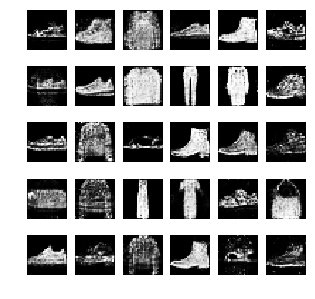

Epoch: 480


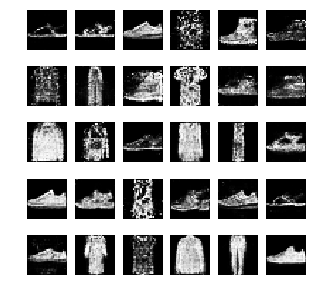

Epoch: 490


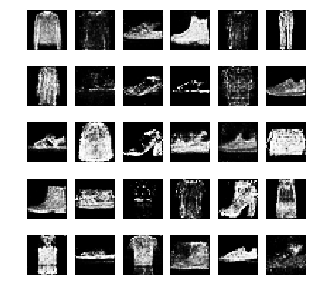

Epoch: 500


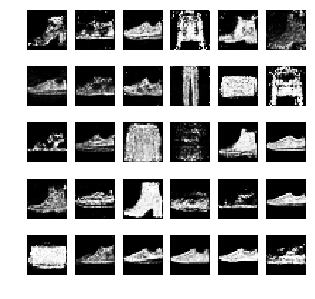

In [0]:
def training_gan(epochs,batch_size):
  batch_count = x.shape[0] / batch_size
  generator= create_gen()
  discriminator= create_disc()
  gan = create_gan(discriminator, generator)
  for e in range(1,epochs+1):
    for count in range(int(batch_count)):
      ######################### generate random noise as input ##########################
      noise=np.random.normal(loc=0, scale=1, size=[batch_size, 100])
      ######################### generate fake random images #############################
      gen_images_batch=generator.predict(noise)
      #print(str(gen_images_batch[5].shape))
      ######################### get random set of real images ###########################
      real_images_batch=x[np.random.randint(low=0,high=x.shape[0],size=batch_size)]
      #print(str(real_images_batch[5].shape))
      ######################## construct batch of real and fake data ####################
      Image_batch=np.concatenate([real_images_batch,gen_images_batch])
      ######################## construct labels of real and fake data ####################
      Image_Labels=np.zeros(2*batch_size) 
      Image_Labels[:batch_size]=0.9 ## real image label is 0.9 and fake image label is 0
      #print(str(Image_Labels))
      ############# Train Discriminator on this image set before starting gan training ####
      discriminator.trainable=True
      discriminator.train_on_batch(Image_batch,Image_Labels)
      ######## Now since the discriminator has been trained so we will not train discriminator again ###########
      discriminator.trainable=False
      
      """
      ################## Check if Discriminator has been trained well #####################
      fake_pred_disc=discriminator.predict(gen_images_batch)
      real_pred_disc=discriminator.predict(real_images_batch)
      print("Discriminator Prediction at batch count: "+str(count+1)+"|| Fake Image: "+str(fake_pred_disc)+" || Real Image: "+str(real_pred_disc))"""
      
      ############################## Creating Target Labels for GAN ########################
      noise=np.random.normal(0,1, [batch_size, 100])
      GAN_Image_Labels=np.ones(batch_size)
      ################# Keeping discriminator off we will train generator ##################
      gan.train_on_batch(noise,GAN_Image_Labels)
      ################# Predict new images using Generator #################################
    if e==1 or e % 10==0:
      print("Epoch: "+str(e))
      noise=np.random.normal(loc=0, scale=1, size=[30, 100])
      gen_images_batch=generator.predict(noise)
      fig=plt.figure(figsize=(5,5))
      columns=6
      rows=5
      for index in range(0,gen_images_batch.shape[0]):
        img=gen_images_batch[index]
        img=img.reshape((28,28))
        fig.add_subplot(rows, columns, index+1)
        imgplot = plt.imshow(img,cmap='gray')
        plt.axis('off')
      plt.show()
training_gan(epochs=500,batch_size=128)        